# Time-series data

Time-series data is a sequence of data points collected over time intervals They are very important especially in finding patterns in data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("E:\\Resource\\DS\\case_time_series.csv")
pd.options.display.max_rows=10
df

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
636,27 October 2021,2021-10-27,16351,34231030,17077,33606620,734,455828
637,28 October 2021,2021-10-28,14307,34245337,13189,33619809,805,456633
638,29 October 2021,2021-10-29,14215,34259552,13549,33633358,551,457184
639,30 October 2021,2021-10-30,12940,34272492,14672,33648030,445,457629


In [2]:
#a little bit of cleaning before visualizing the data
#checking missing values in columns
df.isna().any()

Date               False
Date_YMD           False
Daily Confirmed    False
Total Confirmed    False
Daily Recovered    False
Total Recovered    False
Daily Deceased     False
Total Deceased     False
dtype: bool

No missing values in any of the columns



date info is often loaded as string

In [3]:
df["Date_YMD"].dtypes

dtype('O')

the date column is an object column which is nto good for time series data analysis

In [4]:
#changing the date_YMD column to datetime type,using parse date,and making it to be our index,using index_col
df=pd.read_csv("E:\\Resource\\DS\\case_time_series.csv",parse_dates=["Date_YMD"],index_col="Date_YMD")
df

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date_YMD,,,,,,,
2020-01-30,30 January 2020,1,1,0,0,0,0
2020-01-31,31 January 2020,0,1,0,0,0,0
2020-02-01,1 February 2020,0,1,0,0,0,0
2020-02-02,2 February 2020,1,2,0,0,0,0
2020-02-03,3 February 2020,1,3,0,0,0,0
...,...,...,...,...,...,...,...
2021-10-27,27 October 2021,16351,34231030,17077,33606620,734,455828
2021-10-28,28 October 2021,14307,34245337,13189,33619809,805,456633
2021-10-29,29 October 2021,14215,34259552,13549,33633358,551,457184


In [5]:
df.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2021-10-22', '2021-10-23', '2021-10-24', '2021-10-25',
               '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29',
               '2021-10-30', '2021-10-31'],
              dtype='datetime64[ns]', name='Date_YMD', length=641, freq=None)

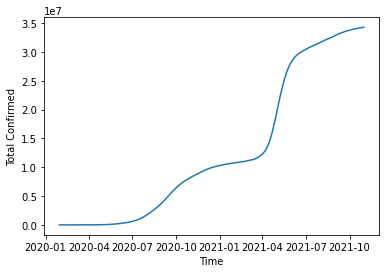

In [6]:
#plotting total number of people confirmed against time
fig, ax=plt.subplots()
ax.plot(df.index,df["Total Confirmed"])
ax.set_xlabel("Time")
ax.set_ylabel("Total Confirmed")
plt.show()

For better analysis we can zoom in on months lets use 2021 months by slicing df

In [7]:
jan21=df["2021-01-01":"2021-01-31"]
jan21

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date_YMD,,,,,,,
2021-01-01,1 January 2021,20159,10306393,23838,9905403,237,148664
2021-01-02,2 January 2021,18144,10324537,20903,9926306,216,148880
2021-01-03,3 January 2021,16678,10341215,19658,9945964,215,149095
2021-01-04,4 January 2021,16278,10357493,29209,9975173,200,149295
2021-01-05,5 January 2021,17909,10375402,21161,9996334,265,149560
...,...,...,...,...,...,...,...
2021-01-27,27 January 2021,11556,10701985,14261,10372680,123,153294
2021-01-28,28 January 2021,18912,10720897,20315,10392995,162,153456
2021-01-29,29 January 2021,13054,10733951,14886,10407881,137,153593


Do the same for the rest of 2021 months in the DataFrame

In [8]:
feb21=df["2021-02-01":"2021-02-28"]
march21=df["2021-03-01":"2021-03-31"]
april21=df["2021-04-01":"2021-04-30"]
may21=df["2021-05-01":"2021-05-31"]
june21=df["2021-06-01":"2021-06-30"]
july21=df["2021-07-01":"2021-07-31"]
aug21=df["2021-08-01":"2021-08-31"]
sep21=df["2021-09-01":"2021-09-30"]
oct21=df["2021-10-01":"2021-10-31"]

plotting daily confirmed number of cases to track the spread of covid

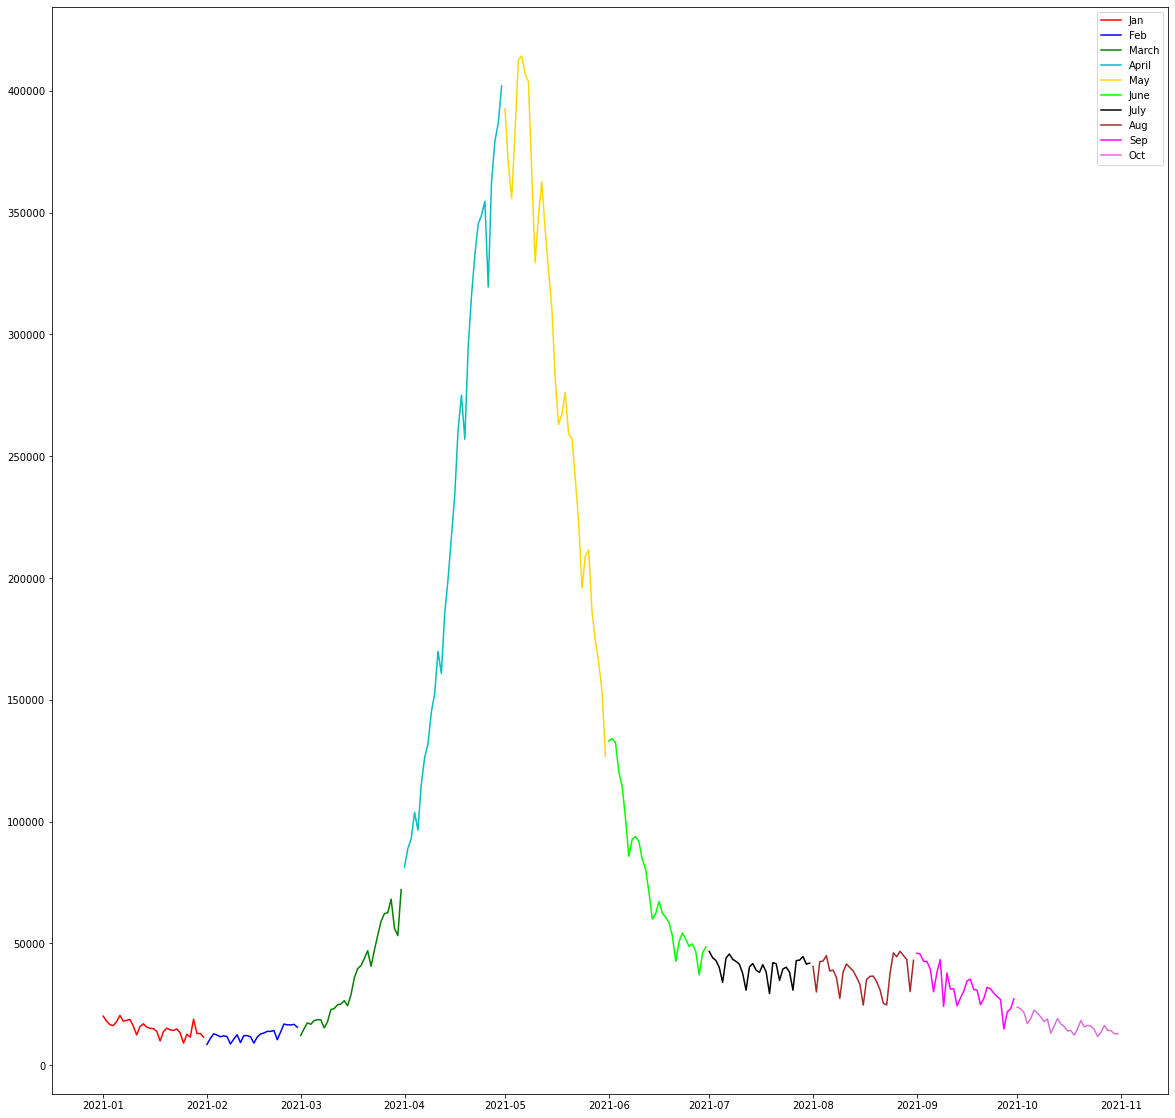

In [9]:
fig,ax=plt.subplots(figsize=(20,20))
ax.plot(jan21.index,jan21["Daily Confirmed"],color='r',label="Jan")
ax.plot(feb21.index,feb21["Daily Confirmed"],color='b',label="Feb")
ax.plot(march21.index,march21["Daily Confirmed"],color='g',label="March")
ax.plot(april21.index,april21["Daily Confirmed"],color='c',label="April")
ax.plot(may21.index,may21["Daily Confirmed"],color='gold',label="May")
ax.plot(june21.index,june21["Daily Confirmed"],color='lime',label="June")
ax.plot(july21.index,july21["Daily Confirmed"],color='k',label="July")
ax.plot(aug21.index,aug21["Daily Confirmed"],color='brown',label="Aug")
ax.plot(sep21.index,sep21["Daily Confirmed"],color='fuchsia',label="Sep")
ax.plot(oct21.index,oct21["Daily Confirmed"],color='orchid',label="Oct")
plt.legend()
plt.show()

This data can also be represented in small multiple charts

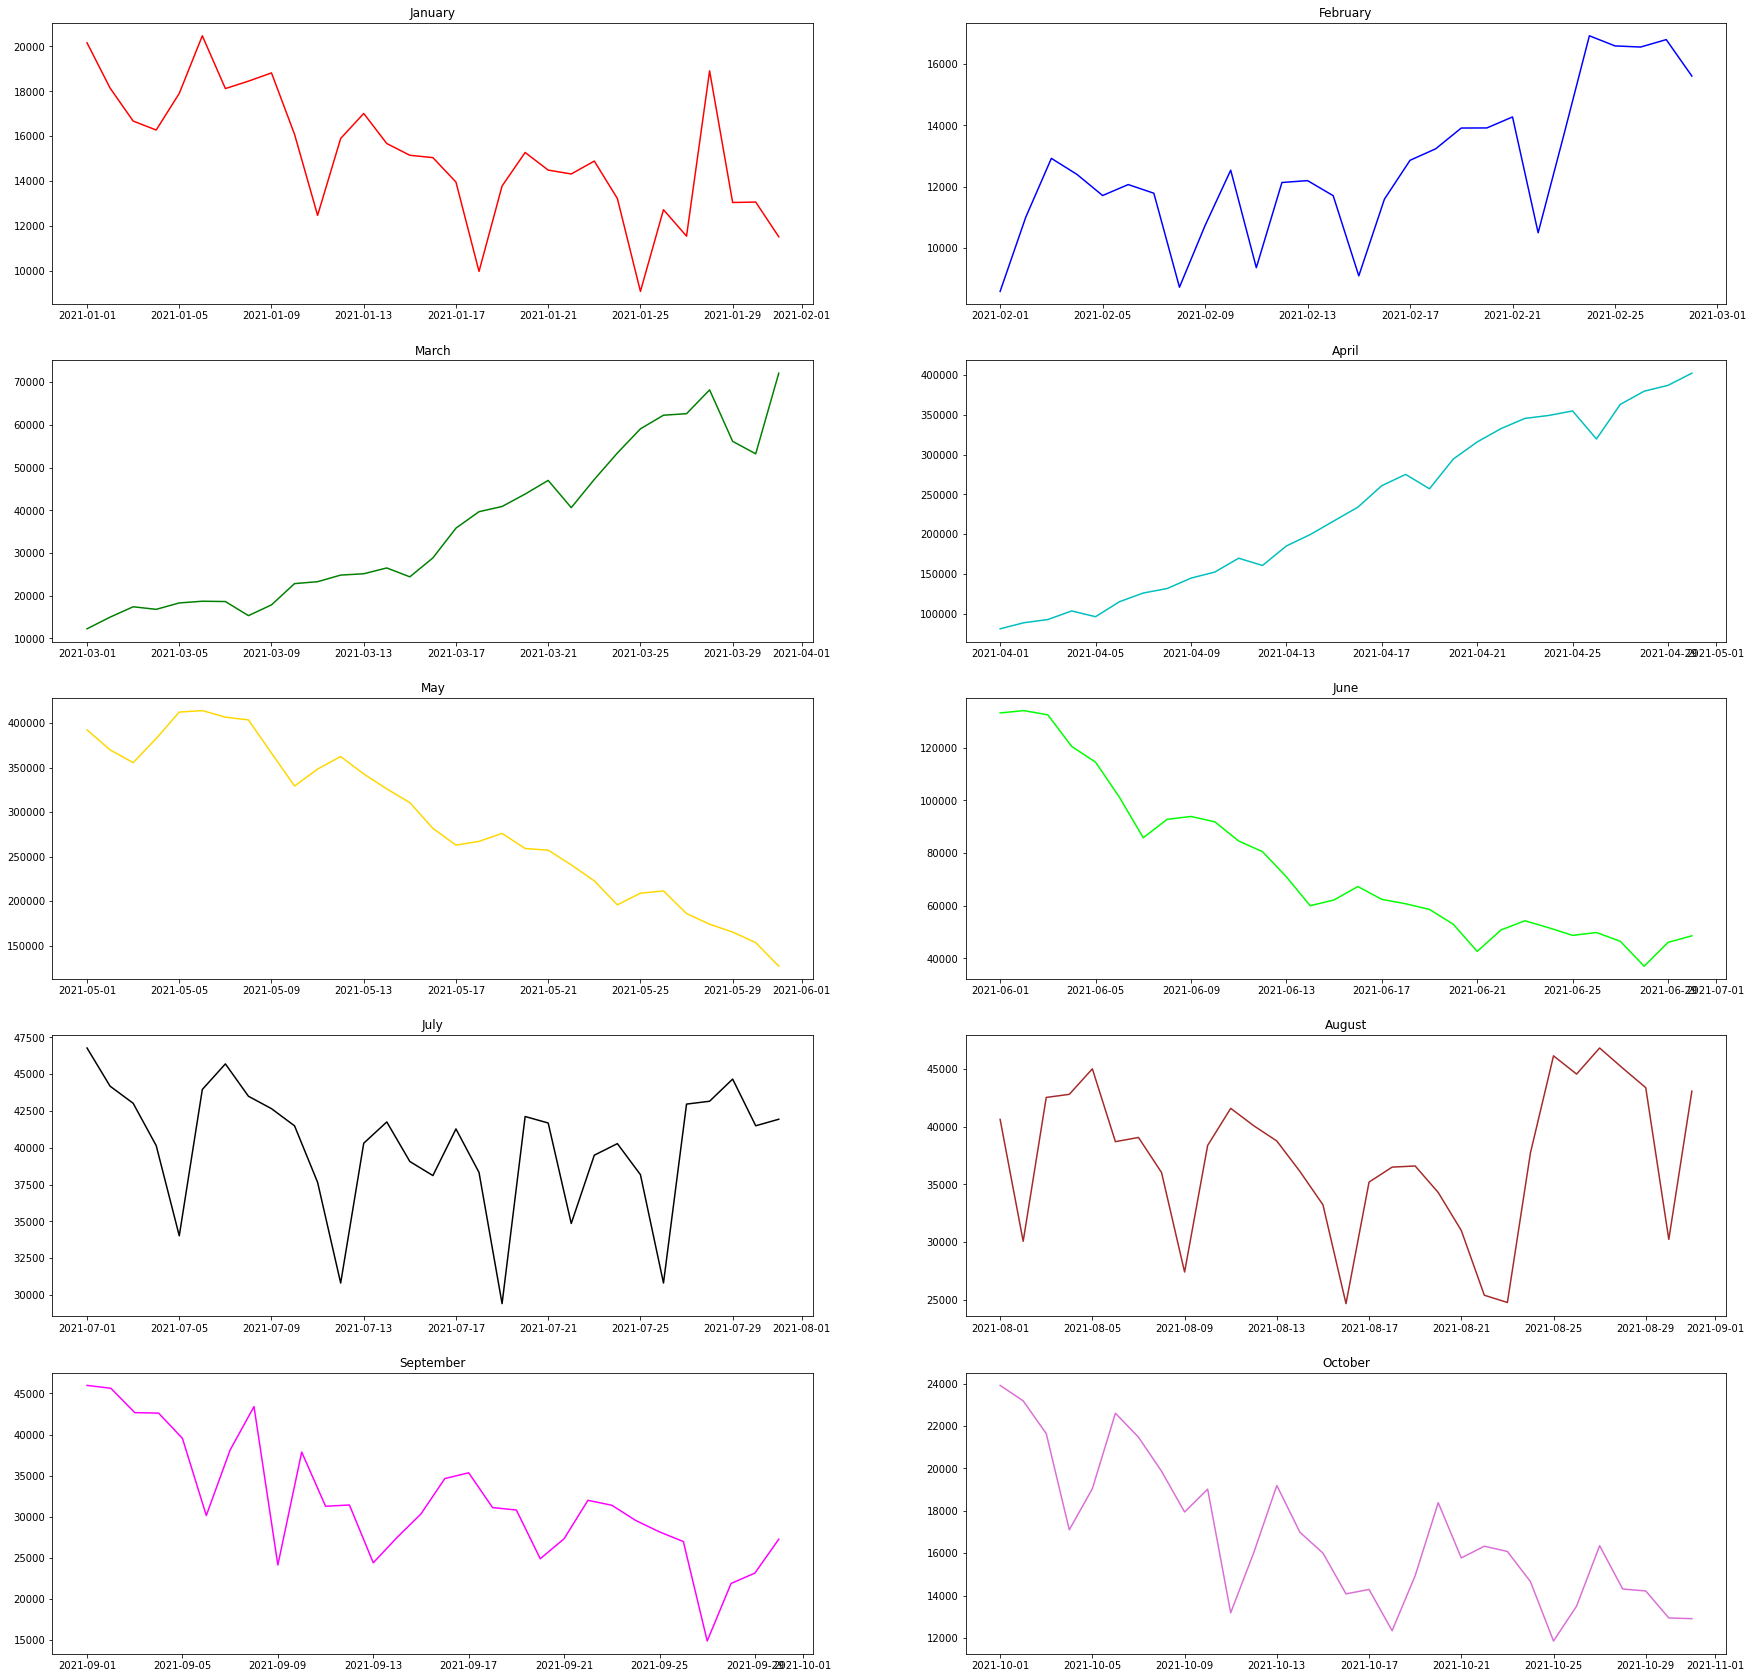

In [15]:
fig,ax=plt.subplots(5,2,figsize=(30, 30))
ax[0,0].plot(jan21.index,jan21["Daily Confirmed"],color='r')
ax[0,0].set_title("January")
ax[0,1].plot(feb21.index,feb21["Daily Confirmed"],color='b')
ax[0,1].set_title("February")
ax[1,0].plot(march21.index,march21["Daily Confirmed"],color='g')
ax[1,0].set_title("March")
ax[1,1].plot(april21.index,april21["Daily Confirmed"],color='c')
ax[1,1].set_title("April")
ax[2,0].plot(may21.index,may21["Daily Confirmed"],color='gold')
ax[2,0].set_title("May")
ax[2,1].plot(june21.index,june21["Daily Confirmed"],color='lime')
ax[2,1].set_title("June")
ax[3,0].plot(july21.index,july21["Daily Confirmed"],color='k')
ax[3,0].set_title("July")
ax[3,1].plot(aug21.index,aug21["Daily Confirmed"],color='brown')
ax[3,1].set_title("August")
ax[4,0].plot(sep21.index,sep21["Daily Confirmed"],color='fuchsia')
ax[4,0].set_title("September")
ax[4,1].plot(oct21.index,oct21["Daily Confirmed"],color='orchid')
ax[4,1].set_title("October")
plt.show()

plotting different variables on the same plot sharing the same x axis

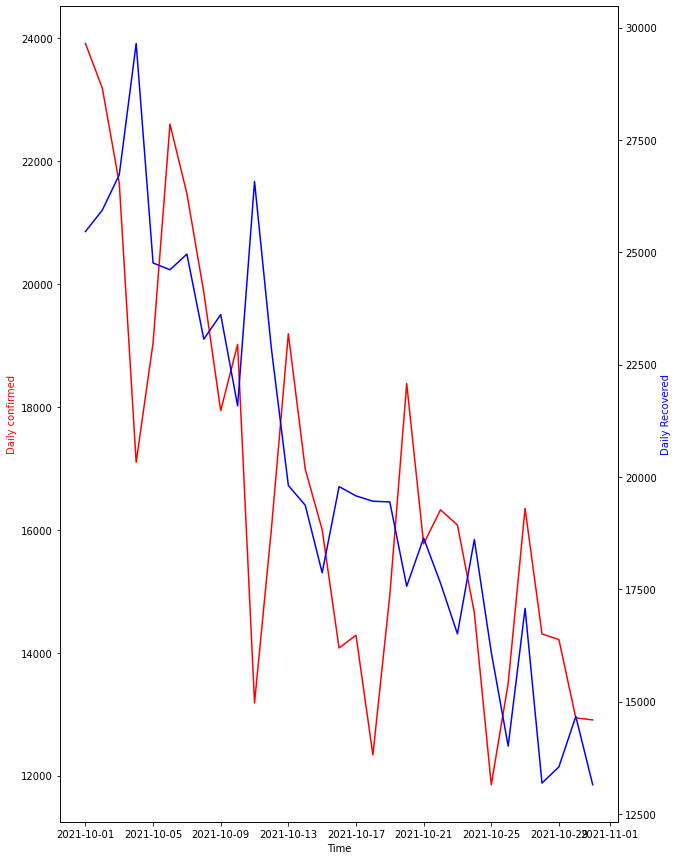

In [16]:
#plotting daily confirmed and daily recovered for the month of october in one plot sharing the same x axis
fig,ax=plt.subplots(figsize=(10,15))
ax.plot(oct21.index,oct21["Daily Confirmed"],color="r")
ax.set_xlabel("Time")
ax.set_ylabel("Daily confirmed",color="r")
ax2=ax.twinx() #creates a twin axis sharing the same x axis
ax2.plot(oct21.index,oct21["Daily Recovered"],color="b")
ax2.set_ylabel("Daily Recovered",color="b")
plt.show()